# IDPET and SOURSOP 

### IDPET loading Ensembles
- Directly from PED 
- Works with multimodel pdb files 

In [ ]:
from idpet.ensemble import Ensemble
from idpet.ensemble_analysis import EnsembleAnalysis
from idpet.visualization import Visualization

ensembles = [

    Ensemble('PED00543e001', database='ped'), # IDPET ensemble from PED database
]

analysis = EnsembleAnalysis(ensembles)
analysis.load_trajectories() # load the trajectories which already downloaded from PED for upcoming analysis

vis = Visualization(analysis=analysis) # make the visualization object for visualizing ensemble features  

### SOURSOP loading Ensembles
- Loading from local data
- Works with trajectory format .dcd, .xtc, ... 

In [3]:
from soursop.sstrajectory import SSTrajectory
import numpy as np

# read in a trajectory
TrajOb = SSTrajectory('../example/PED00543e001.dcd', '../example/PED00543e001.top.pdb')
# get the first protein chain (this is an SSProtein object)
ProtObj = TrajOb.proteinTrajectoryList[0]


### Comparing Ree distribution from two methods

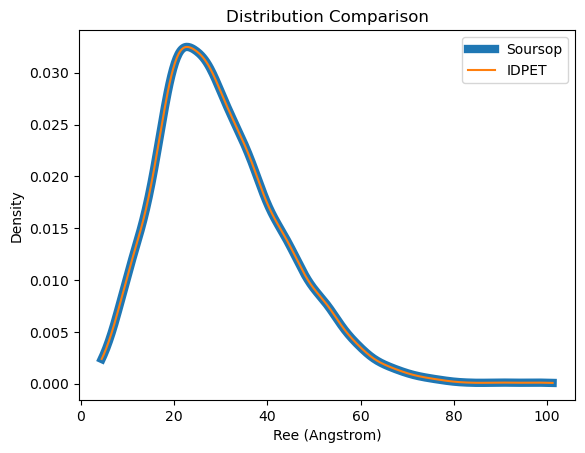

In [ ]:
r_ee_soursop = ProtObj.get_end_to_end_distance(mode='CA')
ree_idpet = analysis.get_features(featurization='end_to_end')["PED00543e001"]*10.0  # convert nm to Angstrom

# plot the comparison
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
kde_x = gaussian_kde(r_ee_soursop)
kde_y = gaussian_kde(ree_idpet)
grid = np.linspace(min(r_ee_soursop.min(), ree_idpet.min()), max(r_ee_soursop.max(), ree_idpet.max()), 500)

plt.plot(grid, kde_x(grid), label='Soursop', color='tab:blue', linewidth=6)
plt.plot(grid, kde_y(grid), label='IDPET', color='tab:orange')
plt.xlabel('Ree (Angstrom)')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution Comparison')
plt.show()

### Comparing Asphericity distribution from two methods

STATUS: On frame 500 of 2998 [computing gyration tensor]
STATUS: On frame 1000 of 2998 [computing gyration tensor]
STATUS: On frame 1500 of 2998 [computing gyration tensor]
STATUS: On frame 2000 of 2998 [computing gyration tensor]
STATUS: On frame 2500 of 2998 [computing gyration tensor]


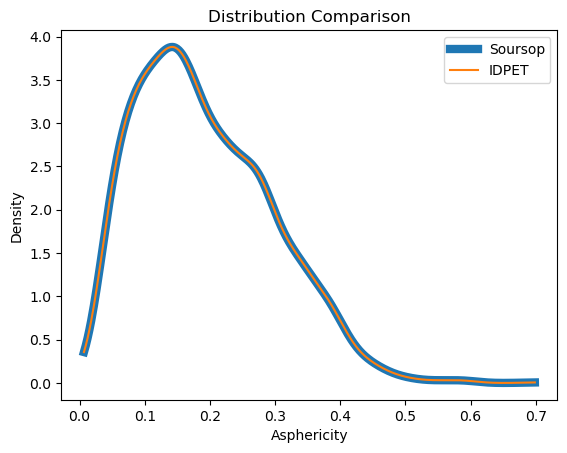

In [45]:
asphericity_soursop = ProtObj.get_asphericity()
asphericity_idpet = analysis.get_features(featurization='asphericity')["PED00543e001"]
kde_x = gaussian_kde(asphericity_soursop)
kde_y = gaussian_kde(asphericity_idpet)
grid = np.linspace(min(asphericity_soursop.min(), asphericity_idpet.min()), max(asphericity_soursop.max(), asphericity_idpet.max()), 500)

plt.plot(grid, kde_x(grid), label='Soursop', color='tab:blue', linewidth=6)
plt.plot(grid, kde_y(grid), label='IDPET', color='tab:orange')
plt.xlabel('Asphericity')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution Comparison')
plt.show()

### Comparing Rg distribution from two methods

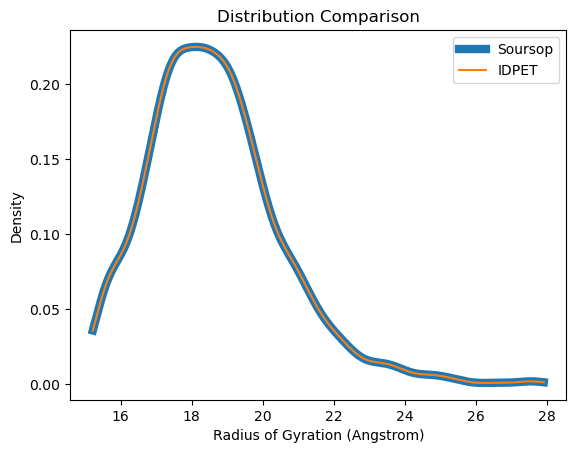

In [46]:
rg_soursop = ProtObj.get_radius_of_gyration()
rg_idpet = analysis.get_features(featurization='rg')["PED00543e001"]*10.0  # convert nm to Angstrom
kde_x = gaussian_kde(rg_soursop)
kde_y = gaussian_kde(rg_idpet)
grid = np.linspace(min(rg_soursop.min(), rg_idpet.min()), max(rg_soursop.max(), rg_idpet.max()), 500)

plt.plot(grid, kde_x(grid), label='Soursop', color='tab:blue', linewidth=6)
plt.plot(grid, kde_y(grid), label='IDPET', color='tab:orange')
plt.xlabel('Radius of Gyration (Angstrom)')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution Comparison')
plt.show()

### Comparing contact map from two methods

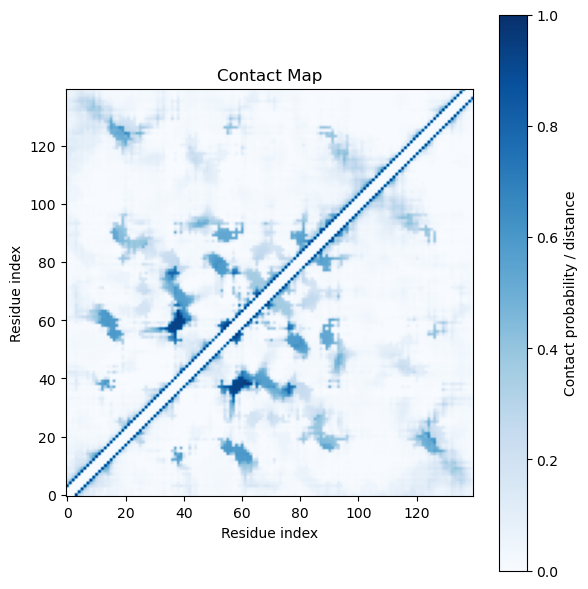

In [47]:
contact_soursop =  ProtObj.get_contact_map(distance_thresh=8.0)
plt.figure(figsize=(6, 6))
plt.imshow(contact_soursop[0], cmap='Blues', origin='lower')
plt.colorbar(label='Contact probability / distance')
plt.title('Contact Map')
plt.xlabel('Residue index')
plt.ylabel('Residue index')
plt.tight_layout()
plt.show()

### In IDPET you can use visualization module and directly have the plot

array([<Axes: title={'center': 'PED00543e001'}, xlabel='j', ylabel='i'>],
      dtype=object)

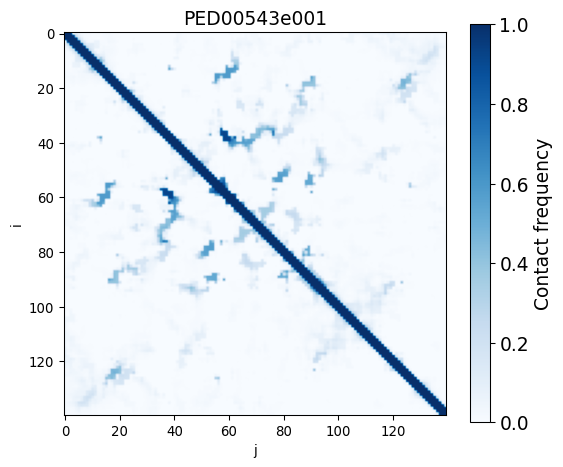

In [43]:
vis.contact_prob_maps(log_scale=False, threshold=0.8, color="Blues")